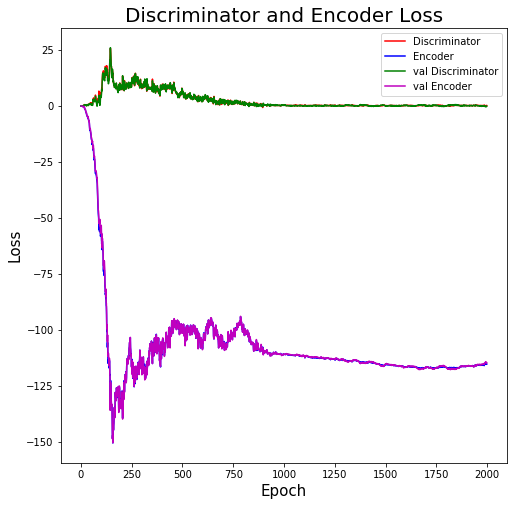

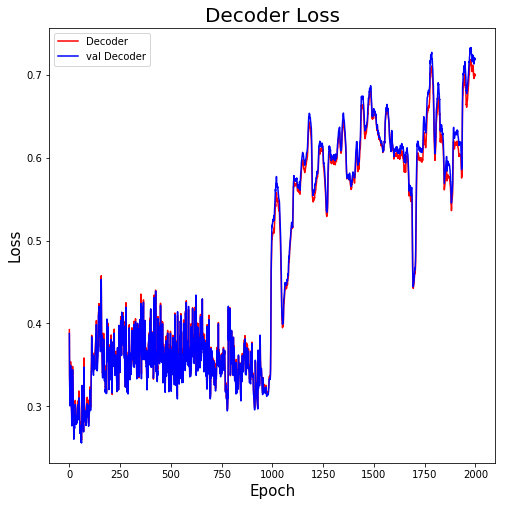

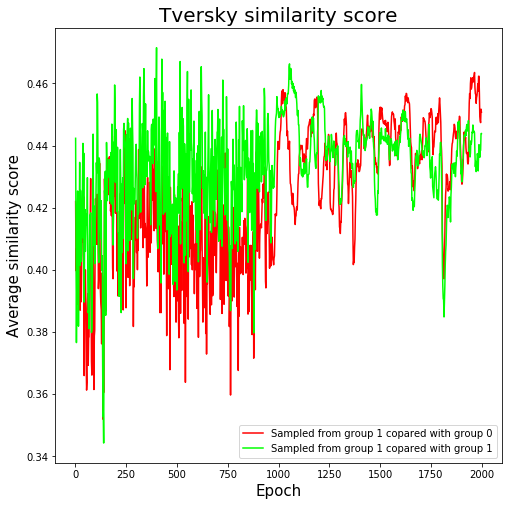

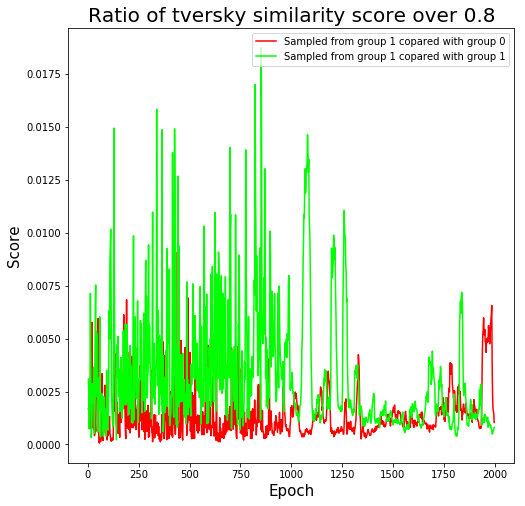

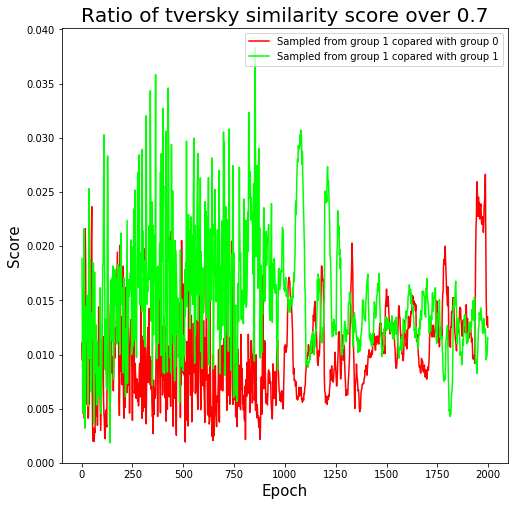

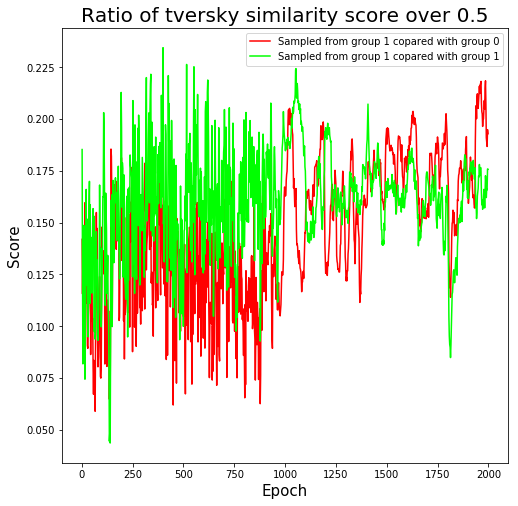

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation 
import data_process as dp

rgb = [(1.0, 0.0, 0.0),(0.0, 1.0, 0.0),(0.0, 0.0, 1.0),(1.0, 1.0, 0.0),(1.0, 0.0, 1.0),
       (0.0, 1.0, 1.0),(0.7, 0.5, 0.5),(0.5, 0.2, 1.0),(1.0, 0.5, 0.7),(0.6, 1.0, 0.2),(0.0, 0.0, 0.0)]

path, files, data_sets, fingerprints = dp.data_path_parse()
dSet = 'HIV'
fps = 'Maccs'
prop = 'psa'
n_class = 2
preTrain= 'scratch'

_path = os.path.join('/mnt/SSD1/data', dSet)

save_path = os.path.join('/mnt/SSD1/Graphs', dSet,fps,prop)
fileName0 = 'Discriminator_encoder_Loss'
fileName0p = 'Decoder_Loss'
fileName1 = 'Average_score'
fileName2 = 'L80_score'
fileName3 = 'L70_score'
fileName4 = 'L50_score'

file_name_train = files['File name'][1] + '_' + fps + '_' + prop + '_classes' +str(n_class)+'_'+preTrain
file_name_sim = files['File name'][3] + '_' + fps + '_' + prop + '_classes' +str(n_class)+'_' + preTrain

f_train = open(os.path.join(_path, file_name_train),'r')
f_sim = open(os.path.join(_path, file_name_sim), 'r')

epoch = []
disLoss = []
encLoss = []
decLoss = []

string_train_data = f_train.read()
string_sim_data = f_sim.read()

f_train.close()
f_sim.close()

list_train_data = string_train_data.split('\n')
list_sim_data = string_sim_data.split('\n')

l = [np.float_(i.split(';')) for i in list_train_data[0:-1]]
l = np.array(l)

l_sim = np.zeros([len(list_sim_data)//(n_class**2),7,n_class**2])
ran = len(list_sim_data)//(n_class**2)
for i in range(ran):
    for j in range(n_class**2):
        l_sim[i,:,j] = np.array([np.float_(k) for k in list_sim_data[i*n_class**2+j+1].split(';')])    

fig0 = plt.figure(figsize = (8,8))
fig0p = plt.figure(figsize = (8,8))
fig1 = plt.figure(figsize = (8,8))
fig2 = plt.figure(figsize = (8,8))
fig3 = plt.figure(figsize = (8,8))
fig4 = plt.figure(figsize = (8,8))

ax0 = fig0.add_subplot(1,1,1)
ax0p = fig0p.add_subplot(1,1,1)
ax1 = fig1.add_subplot(1,1,1)
ax2 = fig2.add_subplot(1,1,1)
ax3 = fig3.add_subplot(1,1,1)
ax4 = fig4.add_subplot(1,1,1)

ax0.set_xlabel('Epoch', fontsize = 15)
ax0.set_ylabel('Loss', fontsize = 15)
ax0.set_title('Discriminator and Encoder Loss', fontsize = 20) #\n for Plasmodium dataset with '+ str(n_class) +' ranges in\n'+ prop+ ' properties' + ' and ' +fps+ ' fingerprints', fontsize = 20)

ax0p.set_xlabel('Epoch', fontsize = 15)
ax0p.set_ylabel('Loss', fontsize = 15)
ax0p.set_title('Decoder Loss', fontsize = 20) #\n for Plasmodium dataset with '+ str(n_class) +' ranges in\n'+ prop+ ' properties' + ' and ' +fps+ ' fingerprints', fontsize = 20)




ax0.plot(l[:,0],l[:,1], c='r')
ax0.plot(l[:,0],l[:,2], c= 'b')
ax0.plot(l[:,0],l[:,4], c='g')
ax0.plot(l[:,0],l[:,5], c= 'm')
ax0.legend(['Discriminator', 'Encoder', 'val Discriminator', 'val Encoder'])
fig0.savefig(os.path.join(save_path, fileName0+'_'+ preTrain + '_' + str(n_class) ))

ax0p.plot(l[:,0],l[:,3], c='r')
ax0p.plot(l[:,0],l[:,6], c= 'b')
ax0p.legend(['Decoder', 'val Decoder'])
fig0p.savefig(os.path.join(save_path, fileName0p+'_' +preTrain+ '_' + str(n_class) ))


count = 1
ax1_legend_list = []
ax2_legend_list = []
ax3_legend_list = []
ax4_legend_list = []

ax1.set_xlabel('Epoch', fontsize = 15)
ax1.set_ylabel('Average similarity score', fontsize = 15)
ax1.set_title('Tversky similarity score', fontsize = 20)

ax2.set_xlabel('Epoch', fontsize = 15)
ax2.set_ylabel('Score', fontsize = 15)
ax2.set_title('Ratio of tversky similarity score over 0.8', fontsize = 20)

ax3.set_xlabel('Epoch', fontsize = 15)
ax3.set_ylabel('Score', fontsize = 15)
ax3.set_title('Ratio of tversky similarity score over 0.7', fontsize = 20)

ax4.set_xlabel('Epoch', fontsize = 15)
ax4.set_ylabel('Score', fontsize = 15)
ax4.set_title('Ratio of tversky similarity score over 0.5', fontsize = 20)

for i in range(n_class*count,n_class*count+n_class):

    c = rgb[i-n_class*count]

    ax1.plot(l_sim[:,0,i],l_sim[:,1,i], c=c)
    ax2.plot(l_sim[:,0,i],l_sim[:,4,i], c=c)
    ax3.plot(l_sim[:,0,i],l_sim[:,5,i], c=c)
    ax4.plot(l_sim[:,0,i],l_sim[:,6,i], c=c)

    ax1_legend_list.append('Sampled from group ' + str(count) + ' copared with group ' + str(i-n_class*count))
    ax2_legend_list.append('Sampled from group ' + str(count) + ' copared with group ' + str(i-n_class*count))
    ax3_legend_list.append('Sampled from group ' + str(count) + ' copared with group ' + str(i-n_class*count))
    ax4_legend_list.append('Sampled from group ' + str(count) + ' copared with group ' + str(i-n_class*count))

ax1.legend(ax1_legend_list)
ax2.legend(ax2_legend_list)
ax3.legend(ax3_legend_list)
ax4.legend(ax4_legend_list)
plt.show()


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation 
import data_process as dp

rgb = [(1.0, 0.0, 0.0),(0.0, 1.0, 0.0),(0.0, 0.0, 1.0),(1.0, 1.0, 0.0),(1.0, 0.0, 1.0),
       (0.0, 1.0, 1.0),(0.7, 0.5, 0.5),(0.5, 0.2, 1.0),(1.0, 0.5, 0.7),(0.6, 1.0, 0.2),(0.0, 0.0, 0.0)]

path, files, data_sets, fingerprints = dp.data_path_parse()

dlist = ['HIV', 'Plas']
flist = ['Morgan', 'Maccs']
plist = ['alogp', 'psa']
nlist = [2,3,5]
tlist = ['scratch', 'preTrain']

for a in dlist:
    for b in flist:
        for o in plist:
            for d in nlist:
                for e in tlist:
                    
                    dSet = a
                    fps = b
                    prop = o
                    n_class = d
                    preTrain= e

                    _path = os.path.join('/mnt/SSD1/data/tmp', dSet)

                    save_path = os.path.join('/mnt/SSD1/Graphs', dSet,fps,prop)
                    fileName0 = 'Discriminator_encoder_Loss'
                    fileName0p = 'Decoder_Loss'
                    fileName1 = 'Average_score'
                    fileName2 = 'L80_score'
                    fileName3 = 'L70_score'
                    fileName4 = 'L50_score'

                    file_name_train = files['File name'][0] + '_' + fps + '_' + prop + '_classes' +str(n_class)+'_'+preTrain
                    file_name_sim = files['File name'][2] + '_' + fps + '_' + prop + '_classes' +str(n_class)+'_' + preTrain

                    f_train = open(os.path.join(_path, file_name_train),'r')
                    f_sim = open(os.path.join(_path, file_name_sim), 'r')

                    epoch = []
                    disLoss = []
                    encLoss = []
                    decLoss = []

                    string_train_data = f_train.read()
                    string_sim_data = f_sim.read()

                    f_train.close()
                    f_sim.close()

                    list_train_data = string_train_data.split('\n')
                    list_sim_data = string_sim_data.split('\n')

                    l = [np.float_(i.split(';')) for i in list_train_data[0:-1]]
                    l = np.array(l)

                    l_sim = np.zeros([len(list_sim_data)//(n_class**2),7,n_class**2])
                    ran = len(list_sim_data)//(n_class**2)
                    for i in range(ran):
                        for j in range(n_class**2):
                            l_sim[i,:,j] = np.array([np.float_(k) for k in list_sim_data[i*n_class**2+j+1].split(';')])    

                    fig0 = plt.figure(figsize = (8,8))
                    fig0p = plt.figure(figsize = (8,8))
                    fig1 = plt.figure(figsize = (8,8))
                    fig2 = plt.figure(figsize = (8,8))
                    fig3 = plt.figure(figsize = (8,8))
                    fig4 = plt.figure(figsize = (8,8))

                    ax0 = fig0.add_subplot(1,1,1)
                    ax0p = fig0p.add_subplot(1,1,1)
                    ax1 = fig1.add_subplot(1,1,1)
                    ax2 = fig2.add_subplot(1,1,1)
                    ax3 = fig3.add_subplot(1,1,1)
                    ax4 = fig4.add_subplot(1,1,1)

                    ax0.set_xlabel('Epoch', fontsize = 15)
                    ax0.set_ylabel('Loss', fontsize = 15)
                    ax0.set_title('Discriminator and Encoder Loss', fontsize = 20) #\n for Plasmodium dataset with '+ str(n_class) +' ranges in\n'+ prop+ ' properties' + ' and ' +fps+ ' fingerprints', fontsize = 20)

                    ax0p.set_xlabel('Epoch', fontsize = 15)
                    ax0p.set_ylabel('Loss', fontsize = 15)
                    ax0p.set_title('Decoder Loss', fontsize = 20) #\n for Plasmodium dataset with '+ str(n_class) +' ranges in\n'+ prop+ ' properties' + ' and ' +fps+ ' fingerprints', fontsize = 20)




                    ax0.plot(l[:,0],l[:,1], c='r')
                    ax0.plot(l[:,0],l[:,2], c= 'b')
                    ax0.plot(l[:,0],l[:,4], c='g')
                    ax0.plot(l[:,0],l[:,5], c= 'm')
                    ax0.legend(['Discriminator', 'Encoder', 'val Discriminator', 'val Encoder'])
                    fig0.savefig(os.path.join(save_path, fileName0+'_'+ preTrain + '_' + str(n_class) ))

                    ax0p.plot(l[:,0],l[:,3], c='r')
                    ax0p.plot(l[:,0],l[:,6], c= 'b')
                    ax0p.legend(['Decoder', 'val Decoder'])
                    fig0p.savefig(os.path.join(save_path, fileName0p+'_' +preTrain+ '_' + str(n_class) ))


                    for count in range(n_class):
                        ax1_legend_list = []
                        ax2_legend_list = []
                        ax3_legend_list = []
                        ax4_legend_list = []

                        ax1.set_xlabel('Epoch', fontsize = 15)
                        ax1.set_ylabel('Average similarity score', fontsize = 15)
                        ax1.set_title('Tversky similarity score', fontsize = 20)

                        ax2.set_xlabel('Epoch', fontsize = 15)
                        ax2.set_ylabel('Score', fontsize = 15)
                        ax2.set_title('Ratio of tversky similarity score over 0.8', fontsize = 20)

                        ax3.set_xlabel('Epoch', fontsize = 15)
                        ax3.set_ylabel('Score', fontsize = 15)
                        ax3.set_title('Ratio of tversky similarity score over 0.7', fontsize = 20)

                        ax4.set_xlabel('Epoch', fontsize = 15)
                        ax4.set_ylabel('Score', fontsize = 15)
                        ax4.set_title('Ratio of tversky similarity score over 0.5', fontsize = 20)

                        for i in range(n_class*count,n_class*count+n_class):

                            c = rgb[i-n_class*count]

                            ax1.plot(l_sim[:,0,i],l_sim[:,1,i], c=c)
                            ax2.plot(l_sim[:,0,i],l_sim[:,4,i], c=c)
                            ax3.plot(l_sim[:,0,i],l_sim[:,5,i], c=c)
                            ax4.plot(l_sim[:,0,i],l_sim[:,6,i], c=c)

                            ax1_legend_list.append('Sampled from group ' + str(count) + ' copared with group ' + str(i-n_class*count))
                            ax2_legend_list.append('Sampled from group ' + str(count) + ' copared with group ' + str(i-n_class*count))
                            ax3_legend_list.append('Sampled from group ' + str(count) + ' copared with group ' + str(i-n_class*count))
                            ax4_legend_list.append('Sampled from group ' + str(count) + ' copared with group ' + str(i-n_class*count))

                        ax1.legend(ax1_legend_list)
                        ax2.legend(ax2_legend_list)
                        ax3.legend(ax3_legend_list)
                        ax4.legend(ax4_legend_list)

                        fig1.savefig(os.path.join(save_path, fileName1+'_' +preTrain + '_Samp_'+str(count)+'_comp_' + str(i-n_class*count)))
                        fig2.savefig(os.path.join(save_path, fileName2 +'_' +preTrain+ '_Samp_'+str(count)+'_comp_' + str(i-n_class*count)))
                        fig3.savefig(os.path.join(save_path, fileName3 + '_' +preTrain +'_Samp_'+str(count)+'_comp_' + str(i-n_class*count)))
                        fig4.savefig(os.path.join(save_path, fileName4 +'_' +preTrain+ '_Samp_'+str(count)+'_comp_' + str(i-n_class*count)))

                        ax1.clear()
                        ax2.clear()
                        ax3.clear()
                        ax4.clear()




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.animation import FuncAnimation 
import data_process as dp

rgb = [(1.0, 0.0, 0.0),(0.0, 1.0, 0.0),(0.0, 0.0, 1.0),(1.0, 1.0, 0.0),(1.0, 0.0, 1.0),
       (0.0, 1.0, 1.0),(0.7, 0.5, 0.5),(0.5, 0.2, 1.0),(1.0, 0.5, 0.7),(0.6, 1.0, 0.2),(0.0, 0.0, 0.0)]

path, files, data_sets, fingerprints = dp.data_path_parse()

dlist = ['HIV', 'Plas']
flist = ['Morgan', 'Maccs']
plist = ['alogp', 'psa']
nlist = [2,3,5]
tlist = ['scratch', 'preTrain']

for a in dlist:
    for b in flist:
        for o in plist:
            for d in nlist:
                for e in tlist:
                    
                    dSet = a
                    fps = b
                    prop = o
                    n_class = d
                    preTrain= e

                    _path = os.path.join('/mnt/SSD1/data/tmp', dSet)

                    save_path = os.path.join('/mnt/SSD1/Graphs', dSet,fps,prop)
                    fileName0 = 'Discriminator_encoder_Loss'
                    fileName0p = 'Decoder_Loss'
                    fileName1 = 'Average_score'
                    fileName2 = 'L80_score'
                    fileName3 = 'L70_score'
                    fileName4 = 'L50_score'

                    file_name_train = files['File name'][0] + '_' + fps + '_' + prop + '_classes' +str(n_class)+'_'+preTrain
                    file_name_sim = files['File name'][2] + '_' + fps + '_' + prop + '_classes' +str(n_class)+'_' + preTrain

                    f_train = open(os.path.join(_path, file_name_train),'r')
                    f_sim = open(os.path.join(_path, file_name_sim), 'r')

                    epoch = []
                    disLoss = []
                    encLoss = []
                    decLoss = []

                    string_train_data = f_train.read()
                    string_sim_data = f_sim.read()

                    f_train.close()
                    f_sim.close()

                    list_train_data = string_train_data.split('\n')
                    list_sim_data = string_sim_data.split('\n')

                    l = [np.float_(i.split(';')) for i in list_train_data[0:-1]]
                    l = np.array(l)

                    l_sim = np.zeros([len(list_sim_data)//(n_class**2),7,n_class**2])
                    ran = len(list_sim_data)//(n_class**2)
                    for i in range(ran):
                        for j in range(n_class**2):
                            l_sim[i,:,j] = np.array([np.float_(k) for k in list_sim_data[i*n_class**2+j+1].split(';')])    

                    


                    for count in range(n_class):
                        L80_average_last200 = []
                        L70_average_last200 = []
                        for i in range(n_class*count,n_class*count+n_class):

                            L80_average_last200[i-n_class*count] = sum(l_sim[-50:,4,i])/50
                            L70_average_last200[i-n_class*count] = sum(l_sim[-50:,5,i])/50
                            
                            


